In [1]:
# A simple RNN for predictive data in form of sine wave

#importing  libraries

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, SimpleRNN, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.optimizers import SGD, Adam
import seaborn as sns
sns.set()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


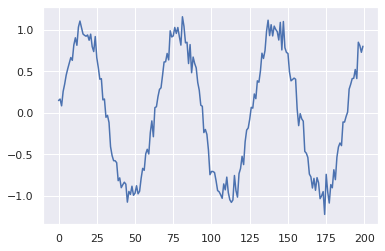

In [2]:
# Creating Series
Series=np.sin(0.1*np.arange(200)) +np.random.randn(200)*0.1
plt.plot(Series)
plt.show()

In [3]:
# Creating Dataset
#We will use T past values to predict next value

T=10
X=[]
Y=[]
D=1   #D is the extra dimension that Simple RNN Will need

for points in range(len(Series)-T):
  x=Series[points:points+T]
  X.append(x)
  y=Series[points+T]
  Y.append(y)

X=np.array(X)
Y=np.array(Y)
N=len(X)                  # N is the number of samples

#Printing shapes of X and Y
print("shape of X and y respectively are {}, {} respectively... ".format(X.shape, Y.shape))

shape of X and y respectively are (190, 10), (190,) respectively... 


In [8]:
# Trying an Autoregression RNN model

i=Input(shape=(T,1))
x=SimpleRNN(5)(i) #By default it will take TanH activation , otherwise specify activation function using 'activation='
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1))
N_new=int(-N/2)
X_train=X[:N_new]
Y_train=Y[:N_new]
X_val=X[N_new:]
Y_val=Y[N_new:]
r=model.fit(X_train,Y_train, epochs=80, validation_data=(X_val,Y_val),)


Epoch 1/80
3/3 [==============================] - 0s 51ms/step - loss: 0.3346 - val_loss: 0.0389
Epoch 2/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0556 - val_loss: 0.0720
Epoch 3/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0533 - val_loss: 0.0525
Epoch 4/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0362 - val_loss: 0.0457
Epoch 5/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0424 - val_loss: 0.0635
Epoch 6/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0352 - val_loss: 0.0411
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0283 - val_loss: 0.0498
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0318 - val_loss: 0.0432
Epoch 9/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0257 - val_loss: 0.0368
Epoch 10/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0239 - val_loss: 0.0371
Epoch 11/80
3/3 [============

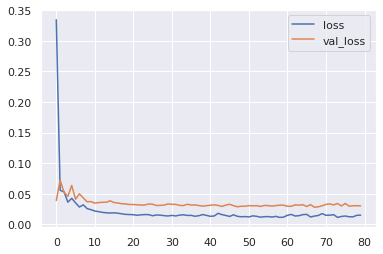

In [9]:
#Plotting loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

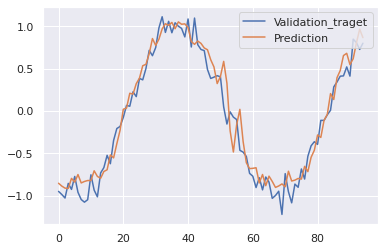

In [10]:
#Wrong forcast using true targets
Validation_prediction=[]

i=int(-N/2) #index of first input

while len(Validation_prediction)<len(Y_val):
  p=model.predict(X[i].reshape(1,-1,1))[0,0]
  i+=1
  Validation_prediction.append(p)

plt.plot(Y_val, label='Validation_traget')
plt.plot(Validation_prediction, label='Prediction')
plt.legend()

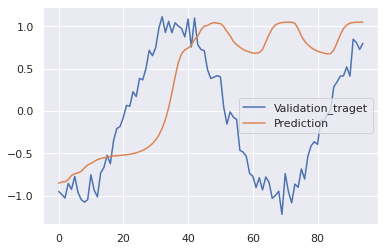

In [11]:
#forcast Furture values using self prediction
validation_prediction=[]

last_x=X[int(-N/2)] #last training input

while len(validation_prediction)<len(Y_val):
  p=model.predict(last_x.reshape(1,-1,1))[0,0]
  #updating prediction list
  validation_prediction.append(p)
  last_x=np.roll(last_x,-1)
  last_x[-1]=p

plt.plot(Y_val, label='Validation_traget')
plt.plot(validation_prediction, label='Prediction')
plt.legend()


In [0]:
#Hence , we can see that simpleRNN Did not worked properly in this case